In [1]:
# import librerie necessarie

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [2]:
# recupero dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

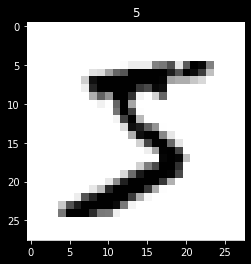

In [3]:
# visualizzazione primo esempio
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title(y_train[0])
plt.show()

In [4]:
# preprocessing dei dataset

print(X_train[0][14])
print('---')
print(y_train[0])

print('\n----------\n')

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train[0][14])
print('---')
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]
---
5

----------

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10498298 0.34940902 0.3689874  0.34978968 0.15370495
 0.04089933 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
---
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
model_without_dropout = Sequential()
model_without_dropout.add(Flatten(input_shape=(28, 28)))
model_without_dropout.add(Dense(512))
model_without_dropout.add(Activation('relu'))
model_without_dropout.add(Dense(512))
model_without_dropout.add(Activation('relu'))
model_without_dropout.add(Dense(10))
model_without_dropout.add(Activation('softmax'))

model_without_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_without_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_8 (Activation)    (None, 10)               

In [17]:
history_without_dropout = model_without_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2101 - accuracy: 0.9359 - val_loss: 0.0967 - val_accuracy: 0.9703

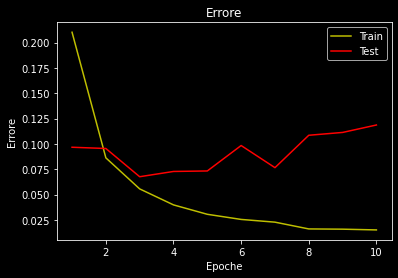

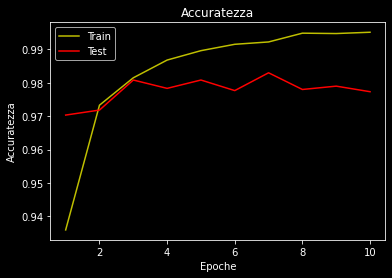

In [18]:
loss = history_without_dropout.history['loss']
val_loss = history_without_dropout.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Train')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.title('Errore')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.show()

acc = history_without_dropout.history['accuracy']
val_acc = history_without_dropout.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Train')
plt.plot(epochs, val_acc, 'r', label='Test')
plt.title('Accuratezza')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()

In [19]:
test_loss, test_acc = model_without_dropout.evaluate(X_test, y_test)

print('Senza dropout, accuratezza nei dati di test =', test_acc * 100, '%')

313/313 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9758
Senza dropout, accuratezza nei dati di test = 97.57999777793884 %


In [20]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(512))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(512))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 512)              

In [21]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3280 - accuracy: 0.9002 - val_loss: 0.1099 - val_accuracy: 0.9695

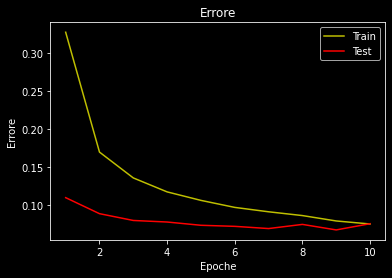

In [25]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Train')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.title('Errore')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.show()

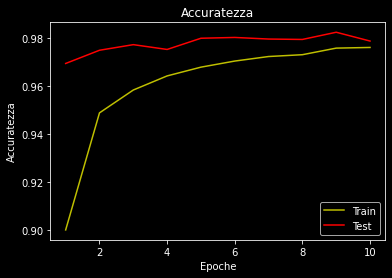

In [26]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Train')
plt.plot(epochs, val_acc, 'r', label='Test')
plt.title('Accuratezza')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
print('Con dropout, accuratezza nei dati di test =', test_acc * 100, '%')

313/313 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9785
Con dropout, accuratezza nei dati di test = 97.85000085830688 %


In [28]:
# altre 10 epoche di addestramento per avere un numero
# di aggiornamenti dei parametri paragonabile al modello
# senza dropout. (il dropout impostato al 50% come in
# questo esempio non permette l'aggiornamento di metà
# delle celle ad ogni batch di ogni epoca)
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Epoch 1/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0736 - val_accuracy: 0.9812

In [29]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
print('Con dropout, accuratezza nei dati di test =', test_acc * 100, '%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9814
Con dropout, accuratezza nei dati di test = 98.14000129699707 %
